_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 7s - loss: 1.9534 - acc: 0.2865 - val_loss: 1.8196 - val_acc: 0.3397
Epoch 2/15
 - 6s - loss: 1.8044 - acc: 0.3439 - val_loss: 1.7852 - val_acc: 0.3597
Epoch 3/15
 - 6s - loss: 1.7414 - acc: 0.3698 - 

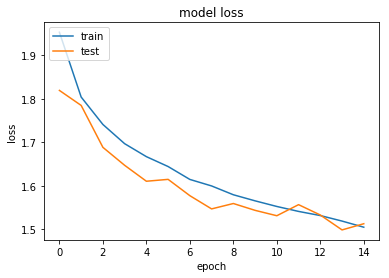

10000/10000 [==============================] - 0s 28us/step

Test accuracy: 47.7%


In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam 
import matplotlib.pyplot as plt


#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#transform labesls to one hot vector
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#Image to Vector 
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))

#normalization [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#3 layer MLP 
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=3072))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

#compiler parameters
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
              
#training Parameters
batch_size = 32
epochs = 15


history = model.fit(x=X_train,y=y_train,batch_size = batch_size,epochs=epochs, verbose=2,validation_split=0.2)

#plotting of train error and tst error
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plotLosses(history)

# validate the model on test dataset to determine generalization
score = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))             
              

              
              







